In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [2]:
import os

In [4]:
used_cars = pd.read_csv("G:/Python/usedcars.csv")

In [5]:
used_cars.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12-07-2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597,12409,NaN,NaN,21973,33619,FL,7100,0,1113
1,2,0,12-07-2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374,12791,NaN,NaN,19638,33619,FL,7600,0,1053
2,3,0,12-07-2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146,8702,NaN,NaN,19638,33619,FL,4900,0,1389
3,4,0,12-07-2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375,5518,NaN,NaN,19638,33619,FL,4100,0,630
4,5,0,12-07-2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739,7911,NaN,NaN,19638,33619,FL,4000,0,1020


In [22]:
data = used_cars.copy()
target = data.pop("IsBadBuy")

In [23]:
data[data.columns[data.dtypes !='object']].head()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
0,1,2006,3,1,89046,8155,9829,11636,13600,7451,8552,11597,12409,21973,33619,7100,0,1113
1,2,2004,5,1,93593,6854,8383,10897,12572,7456,9222,11374,12791,19638,33619,7600,0,1053
2,3,2005,4,2,73807,3202,4760,6943,8457,4035,5557,7146,8702,19638,33619,4900,0,1389
3,4,2004,5,1,65617,1893,2675,4658,5690,1844,2646,4375,5518,19638,33619,4100,0,630
4,5,2005,4,2,69367,3913,5054,7723,8707,3247,4384,6739,7911,19638,33619,4000,0,1020


In [24]:
a = used_cars[used_cars.IsBadBuy == 1]["Nationality"]
b = a.value_counts()

([<matplotlib.patches.Wedge at 0xc0a8d70>,
  <matplotlib.text.Text at 0x8caf4f0>])

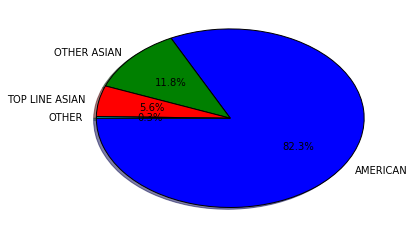

In [25]:
plt.pie(b, labels=b.index, startangle=180, shadow=True,autopct='%1.1f%%')

In [26]:
target_features = data[["MMRAcquisitionAuctionAveragePrice", "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice",
                        "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice","MMRCurrentAuctionCleanPrice",
                        "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice", "WarrantyCost"]]

In [27]:
target_features.describe()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,WarrantyCost
count,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000
mean,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,1276.580985
std,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,598.846788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000
25%,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,837.000000
50%,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,1155.000000
75%,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,1623.000000
max,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,7498.000000


In [28]:
target_features.fillna(target_features.dropna().mean(), inplace='True').describe()

G:\Python\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,6128.909154,7373.636292,8497.035348,9850.929611,6132.081287,7390.681827,8775.723331,10145.385314,1276.580985
std,2461.689142,2722.156232,3155.896033,3385.371987,2429.308083,2680.445479,3084.025786,3303.102877,598.846788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000
25%,4273.000000,5407.000000,6281.000000,7494.000000,4285.000000,5425.000000,6550.000000,7796.000000,837.000000
50%,6098.000000,7305.000000,8446.000000,9790.000000,6076.000000,7328.000000,8753.000000,10114.000000,1155.000000
75%,7765.000000,9021.000000,10650.000000,12088.000000,7732.000000,9006.000000,10897.000000,12308.000000,1623.000000
max,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,7498.000000


In [29]:
target_features.count()

MMRAcquisitionAuctionAveragePrice    72983
MMRAcquisitionAuctionCleanPrice      72983
MMRAcquisitionRetailAveragePrice     72983
MMRAcquisitonRetailCleanPrice        72983
MMRCurrentAuctionAveragePrice        72983
MMRCurrentAuctionCleanPrice          72983
MMRCurrentRetailAveragePrice         72983
MMRCurrentRetailCleanPrice           72983
WarrantyCost                         72983
dtype: int64

In [30]:
logreg = LogisticRegression()
logreg.fit(target_features, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
logreg.coef_

array([[ -4.58503600e-04,   1.24344382e-04,   3.21345359e-04,
         -1.20529537e-04,   2.18766338e-04,  -5.96242082e-05,
         -1.06974896e-04,  -1.47830384e-04,  -1.04805251e-04]])

In [32]:
x = np.arange(1,len(target_features.columns)+1)

In [33]:
y = logreg.coef_.ravel()
y

array([ -4.58503600e-04,   1.24344382e-04,   3.21345359e-04,
        -1.20529537e-04,   2.18766338e-04,  -5.96242082e-05,
        -1.06974896e-04,  -1.47830384e-04,  -1.04805251e-04])

In [34]:
target_features.columns

Index(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'WarrantyCost'],
      dtype='object')

In [35]:
len(target_features.columns)

9

([<matplotlib.axis.XTick at 0x8cc01f0>,
 <a list of 9 Text xticklabel objects>)

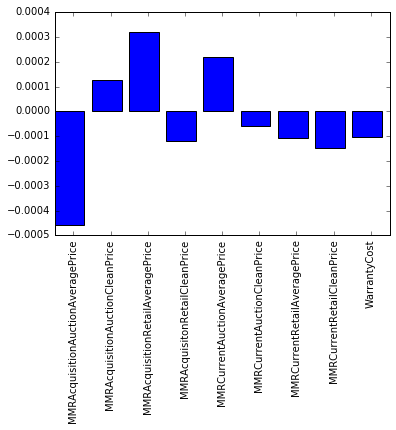

In [36]:
plt.bar(x, y)
plt.xticks(x+.5, target_features.columns, rotation =90)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [38]:
y_pred =logreg.predict(target_features)
confusion = confusion_matrix(target, y_pred )
confusion

array([[64003,     4],
       [ 8975,     1]])

In [39]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

In [40]:
accuracy_score(target, y_pred )

0.87697134949234756

In [41]:
accuracy = (TP + TN)/(TP+TN+FP+FN)

In [42]:
accuracy

0.87697134949234756

#    Sensitivity(True Positive Rate or Recall) = Tp/(TP+FN)
    Specifity : When actual value is negative then how often prediction is correct = TN/(TN+FP)
    Precision : How precise is classifier when detecting positive instance = Tp/(TP+FP)

In [43]:
print("Sensitivity : ", metrics.recall_score(target, y_pred))
print("Precision : ", metrics.precision_score(target, y_pred))
print("Specificity : ", TN/(TN+FP))

Sensitivity :  0.000111408199643
Precision :  0.2
Specificity :  0.999937506835


Model has high Specificity and low sensivity i.e. Model is not correctly predicting positive values

# Decreasing Threshold to predict 1 so as to increase sensitivity

Histagram for predicted probabilities

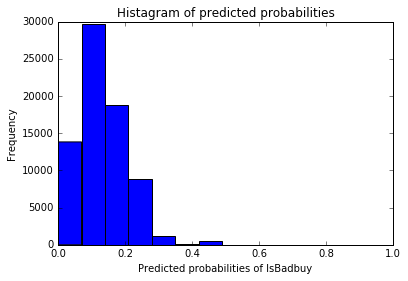

In [44]:
y_pred_prob = logreg.predict_proba(target_features)[:,1]
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.xlabel("Predicted probabilities of IsBadbuy")
plt.ylabel("Frequency")
plt.title("Histagram of predicted probabilities")

In [45]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.25)[0]

G:\Python\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [46]:
print("First Confusion matrix", confusion)

First Confusion matrix [[64003     4]
 [ 8975     1]]


In [47]:
metrics.confusion_matrix(target, y_pred_class)

array([[60574,  3433],
       [ 7999,   977]])

In [67]:
print("New Sensitivity", metrics.recall_score(target, y_pred_class))
print("New Specifity ", 60574/(60574+3433))
1-0.9463652413017326

New Sensitivity 0.108845811052
New Specifity  0.9463652413017326


0.05363475869826739

# Creating ROC and AUC

In [72]:
fpr, tpr, threshold = metrics.roc_curve(target, y_pred_prob)

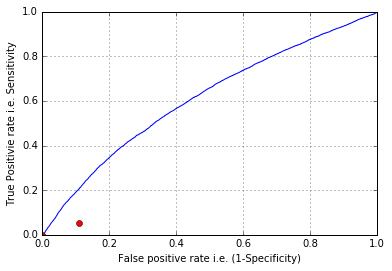

In [73]:
plt.plot(fpr, tpr)
plt.ylabel("True Positivie rate i.e. Sensitivity")
plt.xlabel("False positive rate i.e. (1-Specificity)")
plt.plot([0.000111408199643, 0.108845811052], [6.249316499995494e-05, 0.05363475869826739], 'ro')
plt.grid(True)

Defining a function that accepts Threshold and gives sensitivity and specifity

In [63]:
def evaluate_threshold(th):
    print("Sensitivity : ", tpr[threshold > th][-1])
    print("Specificity : ", 1 - fpr[threshold > th][-1])

In [71]:
print("Sensitivity and specifity with Threashold value of .5 : ")
print(evaluate_threshold(.5))
print("Sensitivity and specifity with Threashold value of .25 : ")
print(evaluate_threshold(.25))

Sensitivity and specifity with Threashold value of .5 : 
Sensitivity :  0.000111408199643
Specificity :  0.999968753418
None
Sensitivity and specifity with Threashold value of .25 : 
Sensitivity :  0.108845811052
Specificity :  0.946365241302
None


# Calculating AUC

In [74]:
metrics.roc_auc_score(target, y_pred_prob)

0.60906105078134976

In [77]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg,target_features, target, cv =10, scoring='roc_auc' )

array([ 0.60272833,  0.60536181,  0.58065999,  0.60445968,  0.57075627,
        0.62747034,  0.61123419,  0.66416501,  0.59278541,  0.6013195 ])

# Analysing Data with Target as IsBadbuy and feature column as MMRAcquisitionAuctionAveragePrice

In [62]:
logreg_1 = LogisticRegression()
y = target
x = data["WarrantyCost"]
x.fillna(x.dropna().mean(), inplace=True)
x = x[:,np.newaxis]

In [63]:
logreg_1.fit(x,y)
y_pred = logreg_1.predict(x)

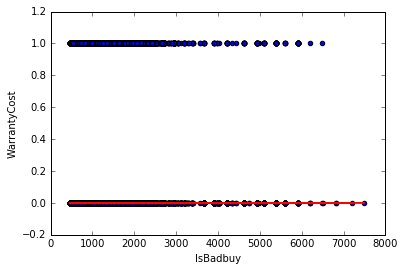

In [65]:
plt.plot(data.WarrantyCost, y_pred, color='r')
plt.scatter(x,y)
plt.ylabel("WarrantyCost")
plt.xlabel("IsBadbuy")